# 7 支持向量机

## 7.1 支持向量分类器（线性核函数）

In [1]:
# R中的e1071库和liblineaR库可以实现SVM
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.3.3"

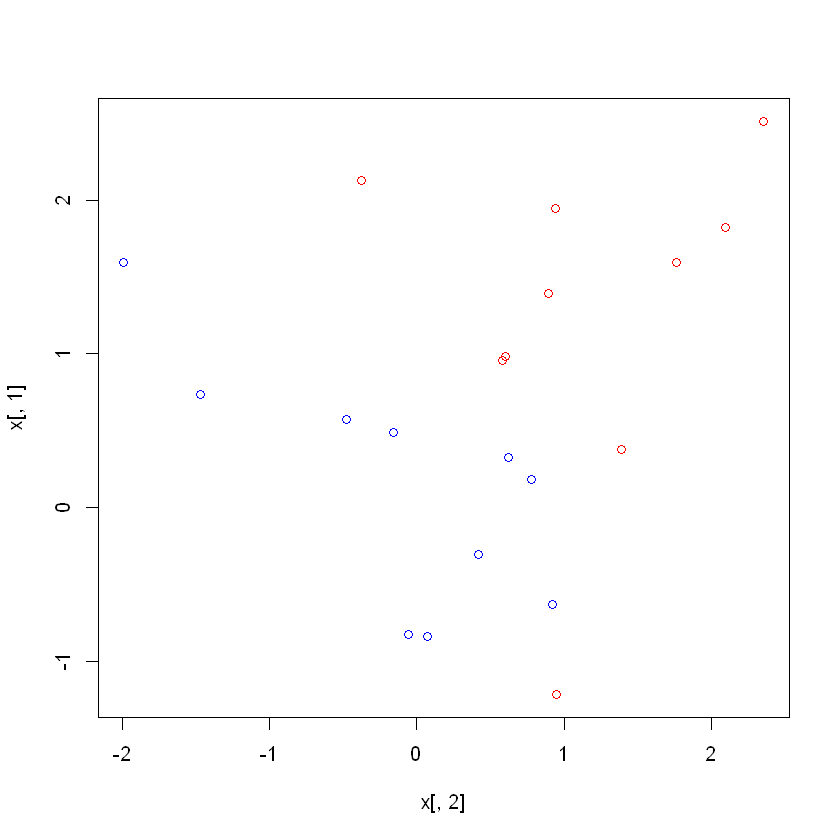

In [2]:
# 生成属于两个不同类别的观测，画图可知，数据并非线性可分
set.seed(1)
x=matrix(rnorm(20*2), ncol=2)
y=c(rep(-1,10), rep(1,10))
x[y==1,]=x[y==1,] + 1
plot(x[,2], x[,1], col=(3-y)) # 为了配合plot.svm()函数，将第一个特征画在x轴，第二个特征画在y轴

In [3]:
# 使用svm()函数进行分类，需要把因变量编码为因子变量
dat=data.frame(x=x, y=as.factor(y))

In [4]:
# cost 参数用来设置观测穿过间隔的成本
# 如果cost参数值设置较小，那么间隔就会很宽，许多支持向量会落在间隔上或者穿过间隔
# 如果cost参数值设置较大，那么间隔就会很窄，更少的支持向最会落在间隔上或者穿过间隔
# scale=FALSE意味着svm()函数不会把特征转换为均值为0、标准差为1的向量
svmfit=svm(y~., data=dat, kernel="linear", cost=10,scale=FALSE)

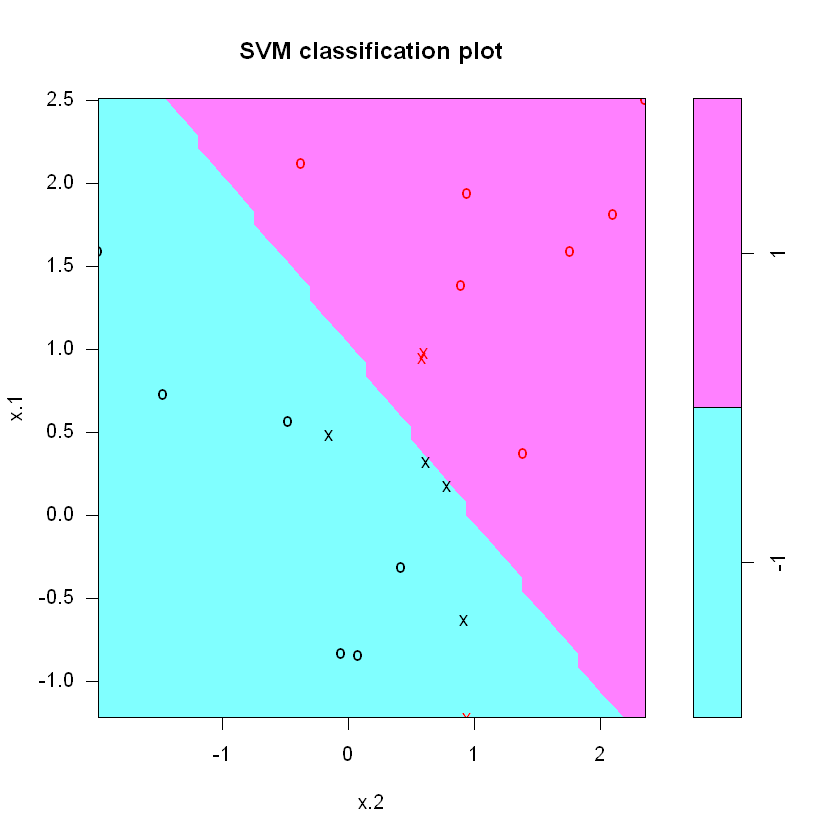

In [5]:
# 画出得到的SVM，plot.svm()函数有两个参数：svm对象和数据；由于kernel="linear"，所以决策边界是线性的
plot(svmfit, dat)

In [6]:
# 一共有7个支持向量，用x表示，可以得到7个支持向量的序号
svmfit$index

[1]  1  2  5  7 14 16 17

In [7]:
# summary()函数可以得到svm对象的一些基本信息
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




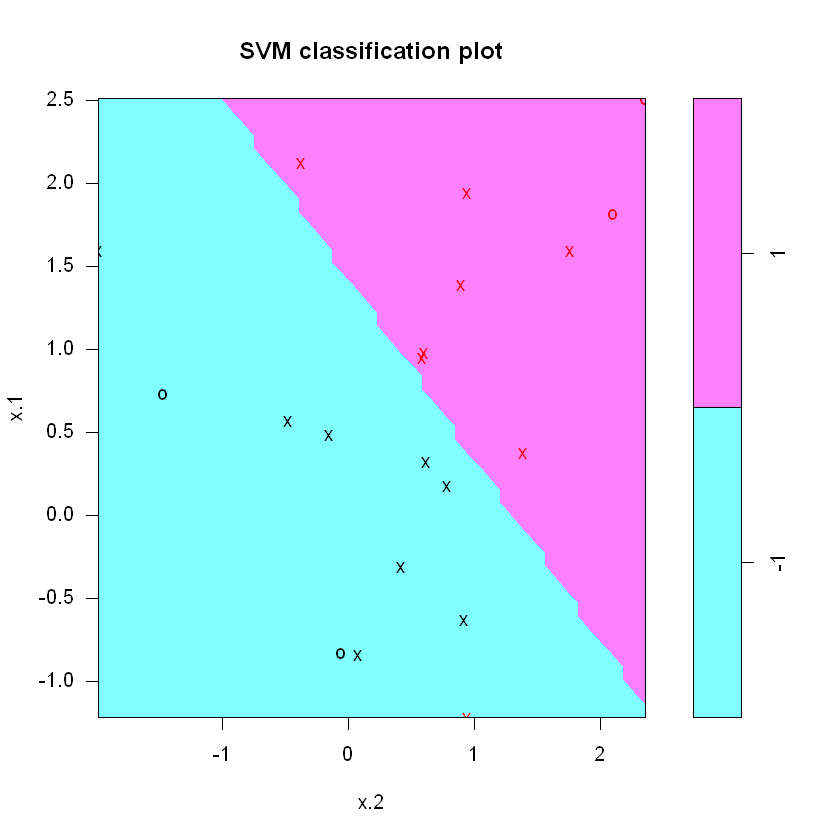

In [8]:
# 尝试使用更小的cost参数值，得到更多支持向量，间隔更宽（用圆圈表示的非支持向量离决策边界很远）
svmfit=svm(y~., data=dat, kernel="linear", cost=0.1,scale=FALSE)
plot(svmfit, dat)

In [9]:
svmfit$index

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

In [10]:
# e1071库的内置函数tune()可以实现交叉验证，默认10折交叉验证
# 在cost参数取值不同的情况下，比较线性核函数SVM的表现
set.seed(1)
tune.out=tune(svm,y~.,data=dat,kernel="linear",ranges=list(cost=c(0.001, 0.01, 0.1, 1,5,10,100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.10  0.2108185
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


In [11]:
# 在cost=0.1的时候，交叉验证错误率最低，获得最优模型
bestmod=tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




In [12]:
# 生成测试数据集
xtest=matrix(rnorm(20*2), ncol=2)
ytest=sample(c(-1,1), 20, rep=TRUE)
xtest[ytest==1,]=xtest[ytest==1,] + 1
testdat=data.frame(x=xtest, y=as.factor(ytest))

In [13]:
# 使用交叉验证得到的最优模型进行预测，并得到混淆矩阵
ypred=predict(bestmod,testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  1
     1   0  8

In [14]:
# 使用cost=0.1的svm，比较测试集上的结果
svmfit=svm(y~., data=dat, kernel="linear", cost=.01,scale=FALSE)
ypred=predict(svmfit,testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  2
     1   0  7

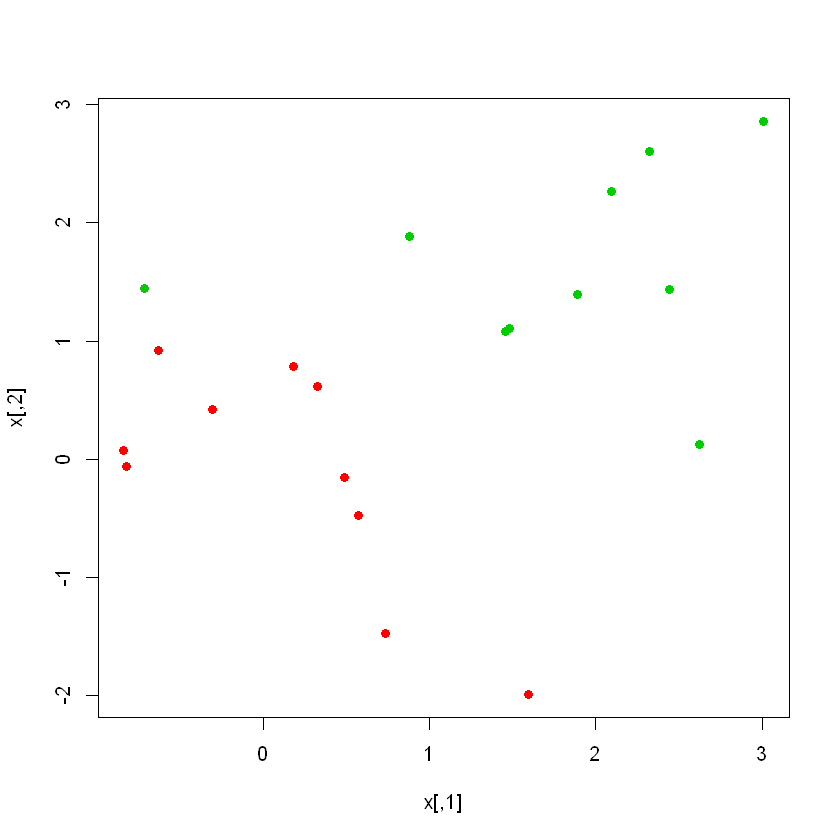

In [15]:
# 建立线性可分的数据集，测试svm()函数的表现
x[y==1,]=x[y==1,]+0.5
plot(x, col=(y+5)/2, pch=19)

In [16]:
# 对于线性可分的数据集，使用更大的cost值，没有观测被误分
dat=data.frame(x=x,y=as.factor(y))
svmfit=svm(y~., data=dat, kernel="linear", cost=1e5)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




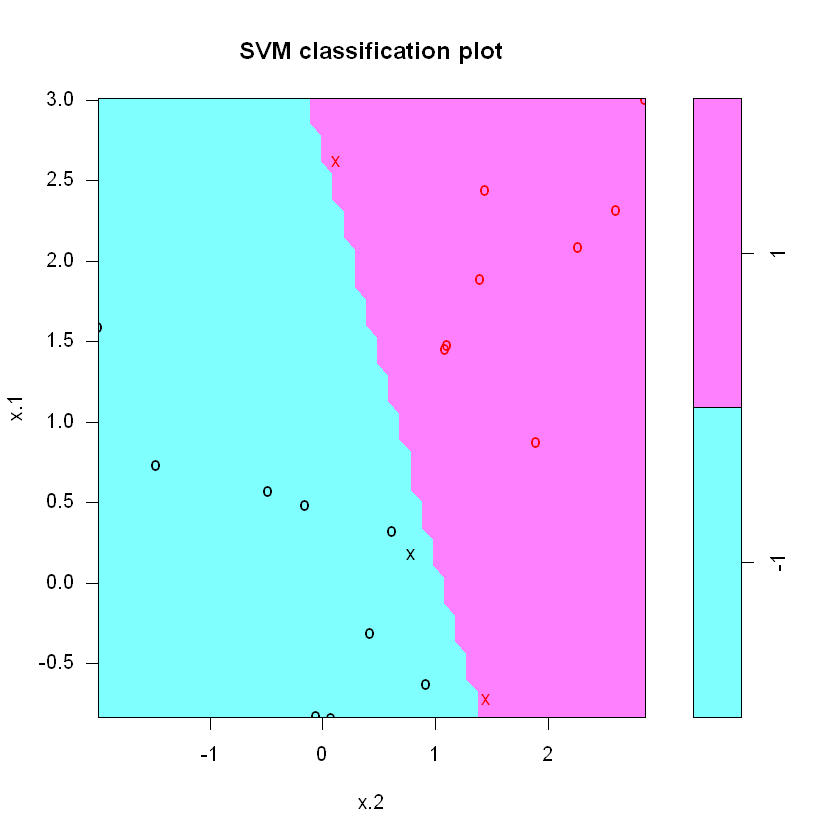

In [17]:
# 只有3个支持向量，间隔很窄（用圆圈表示的非支持向量离决策边界很近）
plot(svmfit, dat)

In [18]:
# 过大的cost值在测试集上的表现可能很差，尝试使用更小的cost值
svmfit=svm(y~., data=dat, kernel="linear", cost=1)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




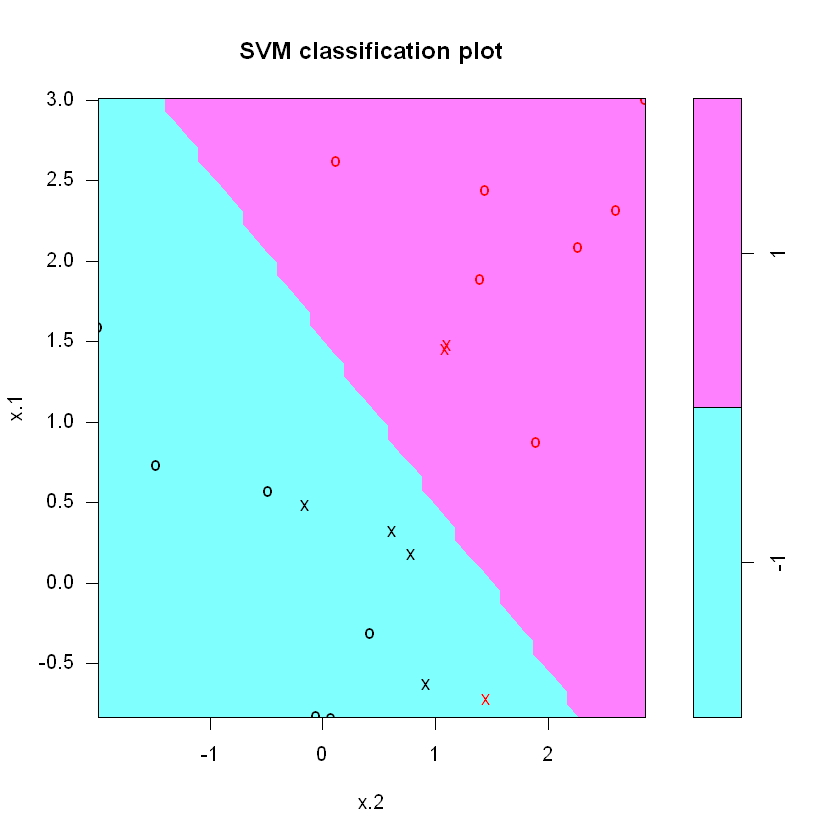

In [19]:
# 一个训练观测被误分了，但是降低了过拟合问题，在测试集上表现会更好
plot(svmfit,dat)

## 7.2 支持向量机（非线性核函数）

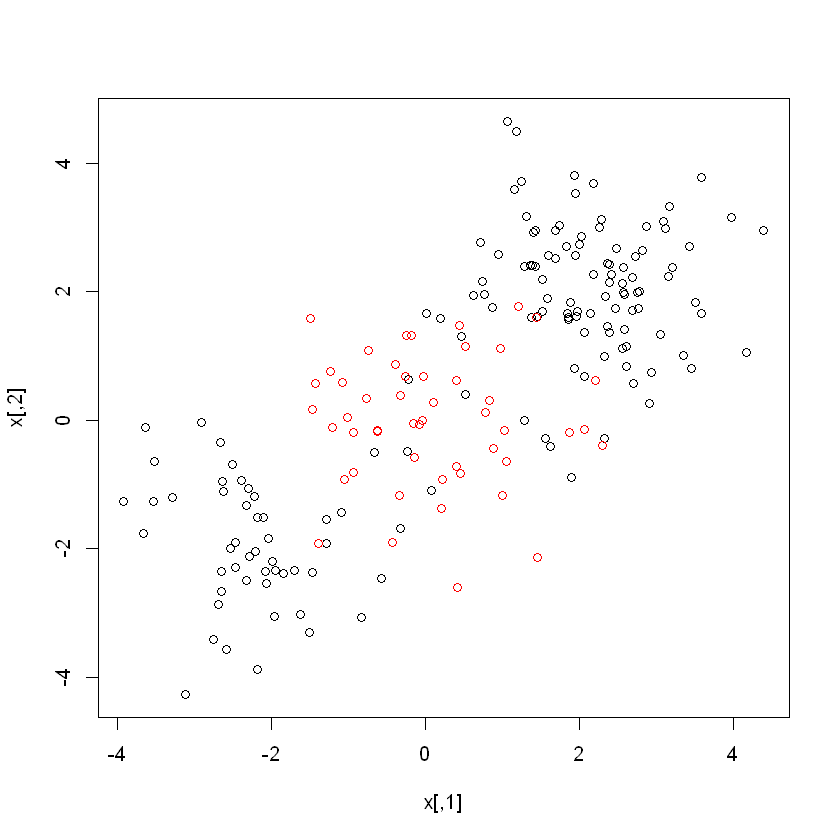

In [20]:
# 生成非线性类别边界的数据集
set.seed(1)
x=matrix(rnorm(200*2), ncol=2)
x[1:100,]=x[1:100,]+2
x[101:150,]=x[101:150,]-2
y=c(rep(1,150),rep(2,50))
dat=data.frame(x=x,y=as.factor(y))
plot(x, col=y)

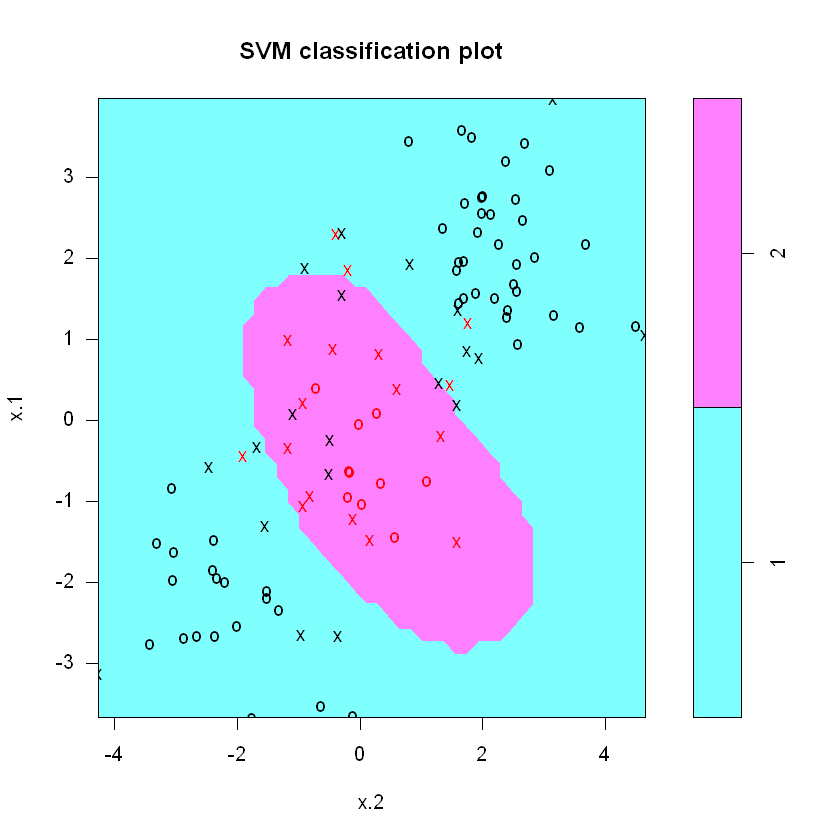

In [21]:
# 使用svm()函数拟合非线性核函数的SVM
# 使用kernel="polynomial"拟合多项式核函数的SVM，设定degree参数指定阶数
# 使用kernel="radial"拟合径向基核函数的SVM，设定gamma参数
# 切分训练集和测试集，使用svm()拟合训练数据，核函数取径向基核函数，gamma=1
train=sample(200,100)
svmfit=svm(y~., data=dat[train,], kernel="radial",  gamma=1, cost=1)
plot(svmfit, dat[train,])

In [22]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  37

 ( 17 20 )


Number of Classes:  2 

Levels: 
 1 2




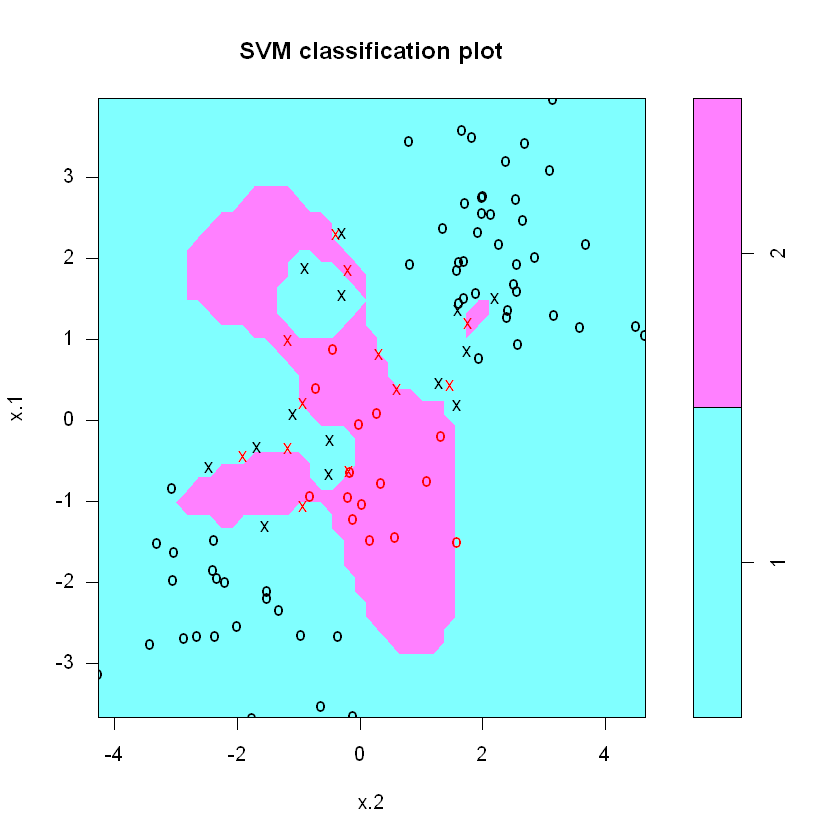

In [23]:
# 使用更大的cost值，可以减少训练数据误差，但是得到更加不规则的决策边界，产生过拟合风险
svmfit=svm(y~., data=dat[train,], kernel="radial",gamma=1,cost=1e5)
plot(svmfit,dat[train,])

In [24]:
# 使用tune()函数选择最优的gamma值和cost值
set.seed(1)
tune.out=tune(svm, y~., data=dat[train,], kernel="radial", ranges=list(cost=c(0.1,1,10,100,1000),gamma=c(0.5,1,2,3,4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     2

- best performance: 0.12 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.27 0.11595018
2  1e+00   0.5  0.13 0.08232726
3  1e+01   0.5  0.15 0.07071068
4  1e+02   0.5  0.17 0.08232726
5  1e+03   0.5  0.21 0.09944289
6  1e-01   1.0  0.25 0.13540064
7  1e+00   1.0  0.13 0.08232726
8  1e+01   1.0  0.16 0.06992059
9  1e+02   1.0  0.20 0.09428090
10 1e+03   1.0  0.20 0.08164966
11 1e-01   2.0  0.25 0.12692955
12 1e+00   2.0  0.12 0.09189366
13 1e+01   2.0  0.17 0.09486833
14 1e+02   2.0  0.19 0.09944289
15 1e+03   2.0  0.20 0.09428090
16 1e-01   3.0  0.27 0.11595018
17 1e+00   3.0  0.13 0.09486833
18 1e+01   3.0  0.18 0.10327956
19 1e+02   3.0  0.21 0.08755950
20 1e+03   3.0  0.22 0.10327956
21 1e-01   4.0  0.27 0.11595018
22 1e+00   4.0  0.15 0.10801234
23 1e+01   4.0  0.18 0.11352924
24 1e+02   4.0  0.21 0.08755950
25 1e+03   4.0  0.24 0

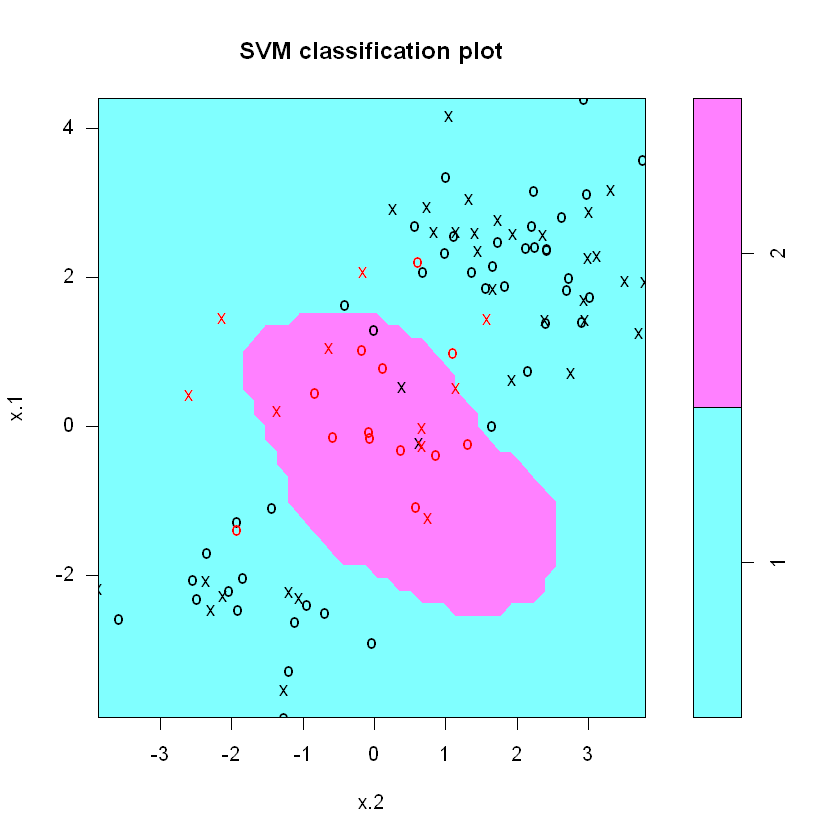

In [25]:
# 画出最优模型在测试集上的表现
plot(tune.out$best.model,dat[-train,])

In [26]:
# 最优模型在测试集上的混淆矩阵
table(true=dat[-train,"y"], pred=predict(tune.out$best.model,newx=dat[-train,]))

    pred
true  1  2
   1 56 21
   2 18  5

In [27]:
# 误分了39%的测试观测
(18+21)/100

[1] 0.39

## 7.3 ROC曲线

In [ ]:
# ROCR包可以用来生成ROC曲线
library(ROCR)

In [ ]:
# 自建函数，给定观测数值得分的pred向量和观测真实类别的truth向量，画出ROC曲线
rocplot=function(pred, truth, ...){
    predob = prediction(pred, truth)
    perf = performance(predob, "tpr", "fpr")
    plot(perf,...)}

In [ ]:
# 在拟合svm()时使用decision.value=TRUE，predict()会输出拟合值（数值得分）
svmfit.opt=svm(y~., data=dat[train,], kernel="radial",gamma=2, cost=1,decision.values=T)

# 获得predict()输出的拟合值
fitted=attributes(predict(svmfit.opt,dat[train,],decision.values=TRUE))$decision.values

# 绘制ROC曲线
rocplot(fitted,dat[train,"y"],main="Training Data")

# 增加gamma值可以更加光滑地拟合数据，进一步提高训练集上的预测准确度
svmfit.flex=svm(y~., data=dat[train,], kernel="radial",gamma=50, cost=1, decision.values=T)
fitted=attributes(predict(svmfit.flex,dat[train,],decision.values=T))$decision.values
rocplot(fitted,dat[train,"y"],col="red")

In [ ]:
# 观察测试集上的预测结果，gamma=2的模型在测试集上表现更好（控制了过拟合）

# gamma=2
fitted=attributes(predict(svmfit.opt,dat[-train,],decision.values=T))$decision.values
rocplot(fitted,dat[-train,"y"],main="Test Data")

# gamma=50
fitted=attributes(predict(svmfit.flex,dat[-train,],decision.values=T))$decision.values
rocplot(fitted,dat[-train,"y"],add=T,col="red")

## 7.4 多分类的SVM

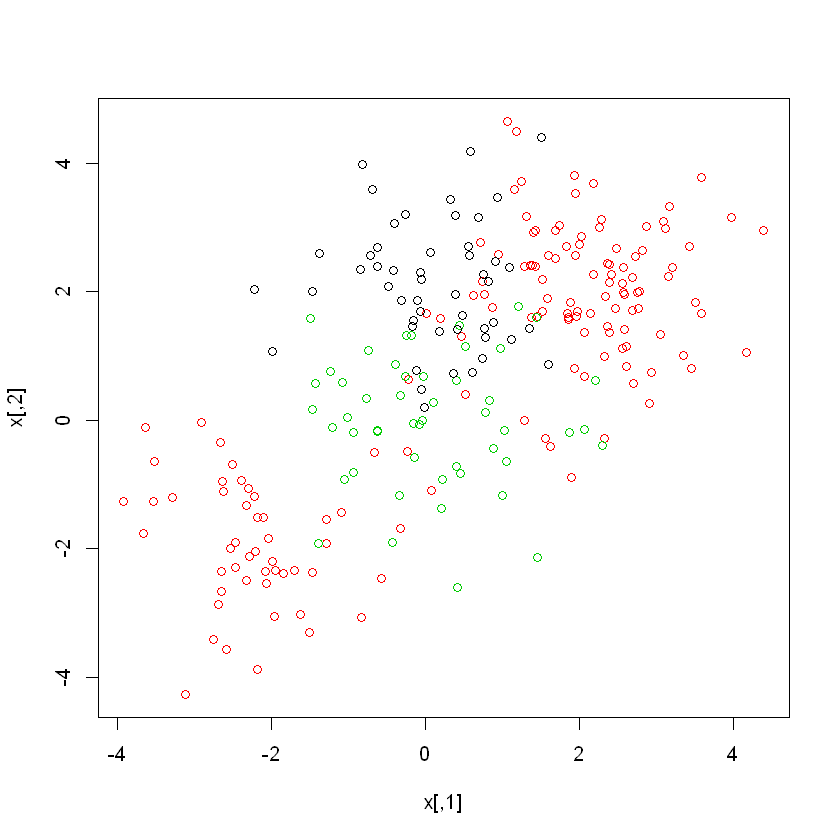

In [28]:
# 相应变量的类别超过2，svm()函数会使用“一类对一类”的方法进行分类
# 在原数据集的基础上生成第三类观测
set.seed(1)
x=rbind(x, matrix(rnorm(50*2), ncol=2))
y=c(y, rep(0,50))
x[y==0,2]=x[y==0,2]+2
dat=data.frame(x=x, y=as.factor(y))
plot(x,col=(y+1))

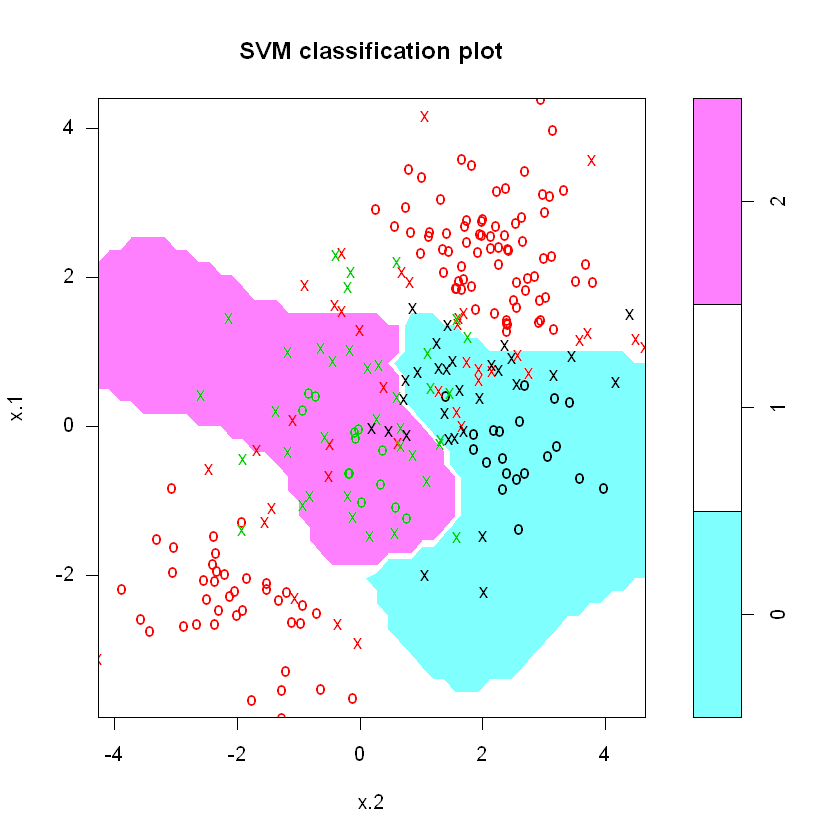

In [29]:
# 使用SVM拟合数据
svmfit=svm(y~., data=dat, kernel="radial", cost=10, gamma=1)
plot(svmfit, dat)

## 7.5 基因表达数据的应用

In [30]:
# Khan数据集由许多组织样本构成，这些样本对应四种不同的蓝色小圆细胞肿瘤
library(ISLR)
names(Khan)

Warning message:
"package 'ISLR' was built under R version 3.3.3"

[1] "xtrain" "xtest"  "ytrain" "ytest"

In [33]:
# 数据集由2308个基因的表达测定组成，训练集和测试集分别由63和20个观测组成
dim(Khan$xtrain)
dim(Khan$xtest)
length(Khan$ytrain)
length(Khan$ytest)

[1]   63 2308

[1]   20 2308

[1] 63

[1] 20

In [34]:
table(Khan$ytrain)
table(Khan$ytest)


 1  2  3  4 
 8 23 12 20 


1 2 3 4 
3 6 6 5 

In [35]:
# 相对于观测的数目来说，特征的数目非常多，因此建议使用线性核函数（使用多项式和径向基核函数获得更高光滑性没有必要）
dat=data.frame(x=Khan$xtrain, y=as.factor(Khan$ytrain))
out=svm(y~., data=dat, kernel="linear",cost=10)
summary(out)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.0004332756 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




In [36]:
# 训练集误差为0，高维数据意味着很容易找到将这些类别完全分开的超平面，但是并不代表模型在测试集上也会有好的效果
table(out$fitted, dat$y)

   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

In [37]:
# 使用cost=10，测试集上有两个观测被误分
dat.te=data.frame(x=Khan$xtest, y=as.factor(Khan$ytest))
pred.te=predict(out, newdata=dat.te)
table(pred.te, dat.te$y)

       
pred.te 1 2 3 4
      1 3 0 0 0
      2 0 6 2 0
      3 0 0 4 0
      4 0 0 0 5